# High performance scientific computing
Lecturer: Assoc. Prof. Yokota Rio - Lecture 2: 12 steps to Navier-Stokes equation
## Step 1: 1-D Linear Convection

The equation for the system is described as a first order linear differential equation:
$$ \frac{\partial u}{\partial t} + c\frac{\partial u}{\partial x} = 0 \\$$
By discretizing the derivative part: (forward for $t$ and backward for $u$)
$$\frac{u^{n+1}_{i}-u^n_i}{\Delta t} + c \frac{u^{n}_{i}-u^n_{i-1}}{\Delta t} = 0 \\$$
The iterative solution for this is:
$$u^{n+1}_{i} = u^n_i - c \frac{\Delta t}{\Delta x}(u^n_i - u^n_{i-1}) \\$$

In [2]:
import numpy as np
from matplotlib import pyplot

In [22]:
# Iterative for 1-D linear convection
def lin_convection_1d(nx=41, nt=100, dt=0.01, c=1, u_init = [2,2,2,2], init_offset = 5) :
    '''
    nx = 41 # Number of horizontal location points (x axis on graph)
    nt = 100 # Number of time step (iteration)
    dt = .01 # Resolution of the time step
    c = 1 # Constant, speed of convection
    '''
    dx = 2./(nx-1) # Space between points
    x = np.linspace(0,2,nx) # vector store value of x
    u = np.ones(nx) # vector store the ground values of velocity
    u[init_offset:(init_offset+len(u_init))] = u_init[:]
    for n in range(nt):
        un = u.copy()
        for i in range(1, nx-1):
            u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])
        pyplot.plot(x, u)
        pyplot.axis([0, 2, .5, 2.5])
        pyplot.pause(0.05)
        # Freeze at the last frame
        if not n == nt-1 :
            pyplot.cla() # Clear the axis - wait for next plot
    pyplot.show()


In [21]:
# Cannot keep the rectangle shape due to numerical diffusion
lin_convection_1d(u_init = 2*np.ones(10), init_offset=10)

In [13]:
# Higher spatial resolution keeps the shape but slow on simulation and 
# the convection speed is unstable with large value
lin_convection_1d(nx=1001, dt=0.0001, nt=151, c=10, 
                  u_init=2*np.ones(200), init_offset=100)

### Discussion:
- The square wave is not maintained due to the first order backward differencing scheme in space creates false diffusion. (Numerical diffusion)
- If we reduce the spatial step (spatial resolution - increase nx) then the error reduces.
- The wave shifts to the right with constant speed $c\Delta t$.
- Near the wall (end of the x array), the line start to become linear (straight line) due to the fact that there is no viscosity defined, hence the non-physical change near the wall.

## Step 2: 1-D Non-linear Convection

From the system of 1-D Linear Convection, now instead of letting the speed of convection being constant, we use $u$ as the speed of convection.
$$ \frac{\partial u}{\partial t} + u\frac{\partial u}{\partial t} = 0 $$
Applying the same discretizing method:
$$ \frac{u_i^{n+1} - u_i^n}{\Delta t} + u^n_i \frac{u^n_i - u^n_{i-1}}{\Delta x} = 0 $$
Transposing:
$$ u^{n+1}_i = u^n_i - u^n_i \frac{\Delta t}{\Delta x}(u^n_i - u^n_{i-1}) $$

In [31]:
def nonlin_convection_1d(nx=41, nt=50, dt=.01, u_init=[2,2,2,2], 
                         init_offset = 5, keep_all=False):
    '''
    nx = 41 # Number of horizontal location points (x axis on graph)
    nt = 100 # Number of time step (iteration)
    dt = .01 # Resolution of the time step
    c = 1 # Constant, speed of convection
    '''
    dx = 2./(nx-1)
    x = np.linspace(0,2,nx)
    u = np.ones(nx)
    u[init_offset:(init_offset+len(u_init))] = u_init[:]
    for n in range(nt):
        un = u.copy()
        for i in range(1,nx-1):
            u[i] = un[i]-un[i]*dt/dx*(un[i]-un[i-1])
        pyplot.plot(x, u)
        pyplot.axis([0, 2, .5, 2.5])
        pyplot.pause(0.05)
        if not keep_all :
            if not n == nt-1 :
                pyplot.cla()
    pyplot.show()


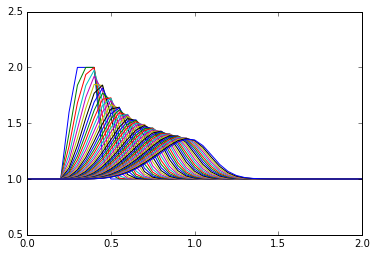

In [34]:
%matplotlib inline
nonlin_convection_1d(keep_all=True)

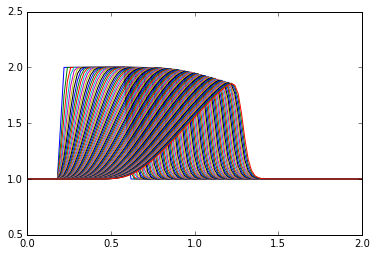

In [36]:
nonlin_convection_1d(nx=101, nt=101, dt=0.005, 
                     u_init=2*np.ones(20), init_offset=10, keep_all=True)

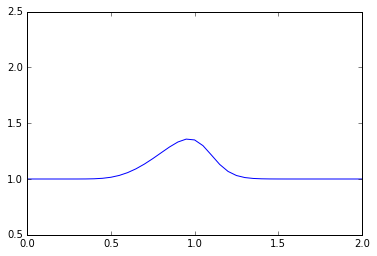

In [42]:
nonlin_convection_1d()

### Discussion:
- The first order backward differencing scheme in space still creates false diffusion as before.
- Due to the non-linearity in the governing equation, if the spatial step is reduced, the solution can develop shocks.